In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from modules.stableDT import stableDecisionTree # file 제공
from modules.stableDT import visualize_tree # file 제공

In [22]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [23]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [24]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [25]:
X = data[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']].copy()
y = data['Attrition'].copy()

In [26]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [70]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
min_sample_ratio = 0.03 # 최소 샘플 수로 dataset의 샘플 수의 3%
#max_depth = 4
impurity_measure='entropy'
iter_num=30

clf = stableDecisionTree(
    min_sample = min_sample_ratio*len(X), 
    iter_num = iter_num,
    impurity_measure = impurity_measure)
clf.fit(X_train,y_train)

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1176, 30) (1176,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1956, 30) (1956,)
SMOTE 적용 후 레이블 값 분포: 
 0    978
1    978
Name: Attrition, dtype: int64


In [30]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,Travel_Rarely,866,Sales,5,3,Medical,4,Male,84,...,3,4,0,6,4,3,5,4,1,3
184,53,Travel_Rarely,1084,Research & Development,13,2,Medical,4,Female,57,...,3,3,2,5,3,3,4,2,1,3
1222,24,Travel_Rarely,240,Human Resources,22,1,Human Resources,4,Male,58,...,3,3,1,1,2,3,1,0,0,0
67,45,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,2,Male,59,...,3,3,1,25,2,3,1,0,0,0
220,36,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,4,Male,62,...,3,4,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,34,Travel_Rarely,304,Sales,2,3,Other,4,Male,60,...,4,3,0,6,5,3,6,5,1,4
560,34,Travel_Rarely,167,Research & Development,8,5,Life Sciences,2,Female,32,...,3,3,1,7,3,3,0,0,0,0
945,50,Travel_Rarely,1322,Research & Development,28,3,Life Sciences,4,Female,43,...,3,2,0,25,2,3,3,2,1,2
522,37,Travel_Rarely,1225,Research & Development,10,2,Life Sciences,4,Male,80,...,3,1,0,4,2,3,1,0,0,0


In [31]:
# predictive performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(X_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y, pos_label='Yes')
acc, f1

(0.8537414965986394, 0.24561403508771928)

In [32]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[244  11]
 [ 32   7]]


In [33]:
# exporting rules to text
clf.export_text()

IF OverTime != No AND MonthlyIncome <= 2800.0 AND DistanceFromHome > 15.0 THEN y = Yes
IF OverTime != No AND MonthlyIncome <= 2800.0 AND DistanceFromHome <= 15.0 AND EnvironmentSatisfaction != 1.0 AND MonthlyRate > 5207.0 AND Age > 20.0 AND HourlyRate > 87.0 THEN y = Yes
IF OverTime != No AND MonthlyIncome > 2800.0 AND MaritalStatus != Single AND YearsInCurrentRole <= 7.0 AND MonthlyRate > 24539.0 THEN y = Yes
IF OverTime == No AND TotalWorkingYears <= 2.0 AND JobRole != Research Scientist AND Age <= 33.0 AND DailyRate <= 500.0 THEN y = Yes
IF OverTime != No AND MonthlyIncome <= 2800.0 AND DistanceFromHome <= 15.0 AND EnvironmentSatisfaction == 1.0 THEN y = Yes
IF OverTime != No AND MonthlyIncome <= 2800.0 AND DistanceFromHome <= 15.0 AND EnvironmentSatisfaction != 1.0 AND MonthlyRate <= 5207.0 THEN y = Yes
IF OverTime != No AND MonthlyIncome <= 2800.0 AND DistanceFromHome <= 15.0 AND EnvironmentSatisfaction != 1.0 AND MonthlyRate > 5207.0 AND Age <= 20.0 THEN y = Yes
IF OverTime != No

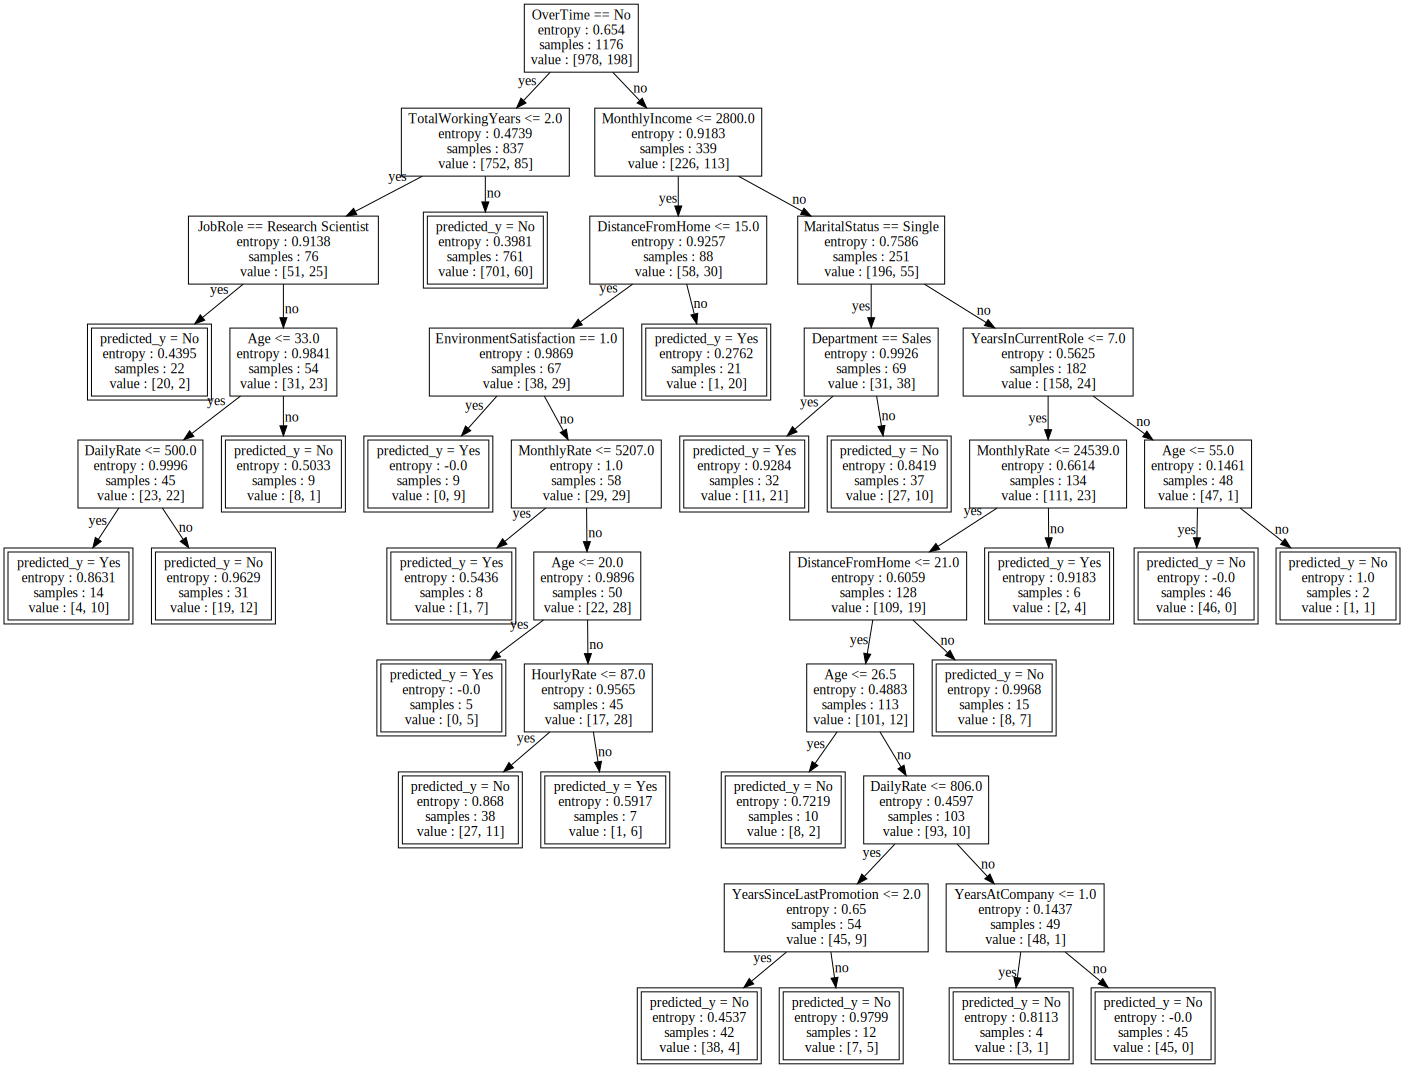

In [34]:
# images
visualize_tree(clf.root)

In [35]:
attrition_tree = visualize_tree(clf.root)
attrition_tree.format = 'png'
attrition_tree.render(filename='Attrition_tree', directory='./', cleanup=True)


'.\\Attrition_tree.png'

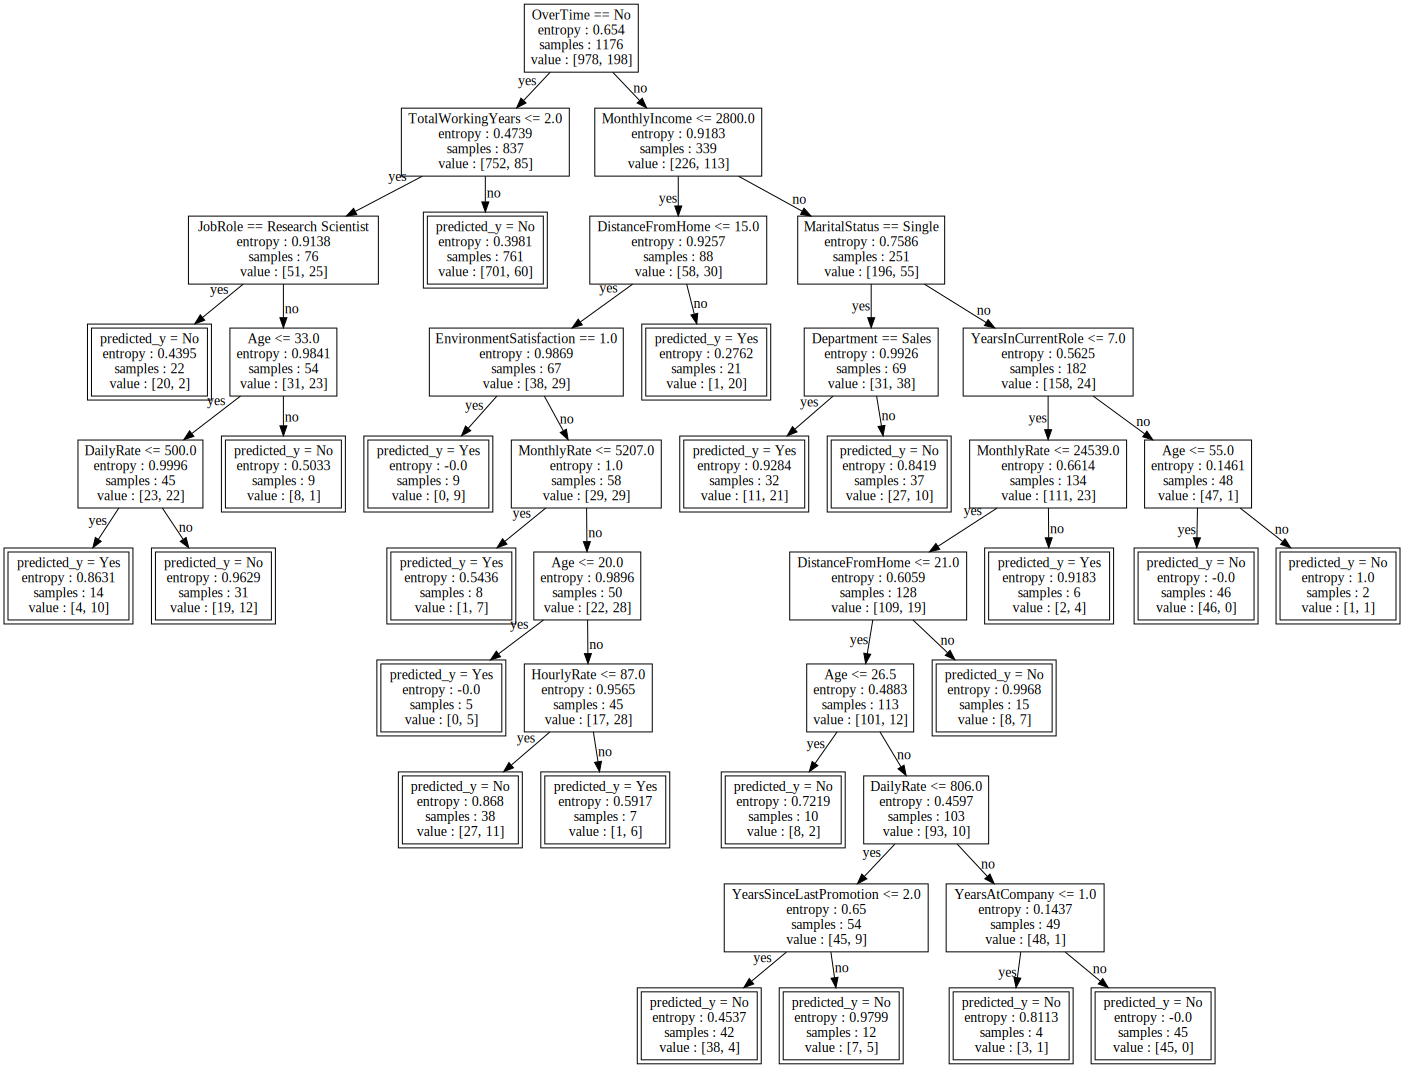

In [36]:
attrition_tree

# 2. stable_CRI

In [6]:
# stable_CRI 모델 돌리기 위해서 범주형변수 숫자로 변환해줘야됨!
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['BusinessTravel'] = encoder.fit_transform(data['BusinessTravel'].values)
data['Department'] = encoder.fit_transform(data['Department'].values)
data['EducationField'] = encoder.fit_transform(data['EducationField'].values)
data['Gender'] = encoder.fit_transform(data['Gender'].values)
data['JobRole'] = encoder.fit_transform(data['JobRole'].values)
data['MaritalStatus'] = encoder.fit_transform(data['MaritalStatus'].values)
data['OverTime'] = encoder.fit_transform(data['OverTime'].values)
data['Attrition']= encoder.fit_transform(data['Attrition'].values)

In [9]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = data.copy()
target_name = 'Attrition' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

In [10]:
min_sample_ratio = 0.03
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 10 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 20, rule_rate = 0.9) 

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
# predictive performance
# f1 : macro-averaging for multiclass
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(0.8503, 0.5792)

In [14]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[243   5]
 [ 39   7]]


In [15]:
# rules
cri.export_text()

IF ['YearsWithCurrManager >= 10.5'] THEN Attrition = 0   (homogeneity = 0.9839 , coverage = 0.0527 )
IF ['MonthlyIncome >= 13710.5'] THEN Attrition = 0   (homogeneity = 0.9741 , coverage = 0.0986 )
IF ['YearsInCurrentRole >= 7.5'] THEN Attrition = 0   (homogeneity = 0.9426 , coverage = 0.1777 )
IF ['JobRole < 0.5'] THEN Attrition = 0   (homogeneity = 0.932 , coverage = 0.0876 )
IF ['OverTime < 0.5'] THEN Attrition = 0   (homogeneity = 0.897 , coverage = 0.71 )
IF ['TotalWorkingYears >= 11.5'] THEN Attrition = 0   (homogeneity = 0.9075 , coverage = 0.3495 )
IF ['Age >= 35.5'] THEN Attrition = 0   (homogeneity = 0.8935 , coverage = 0.4949 )
IF ['YearsWithCurrManager < 10.5', 'MonthlyIncome < 13710.5', 'YearsInCurrentRole < 7.5', 'JobRole >= 0.5', 'OverTime >= 0.5', 'TotalWorkingYears < 11.5', 'MonthlyIncome < 2540.5'] THEN Attrition = 1   (homogeneity = 0.75 , coverage = 0.0476 )


In [16]:
cri.df_concise_rule

,0,1,2,3,4,5,6,7
Rule,YearsWithCurrManager >= 10.5,MonthlyIncome >= 13710.5,YearsInCurrentRole >= 7.5,JobRole < 0.5,TotalWorkingYears >= 11.5,OverTime < 0.5,Age >= 35.5,"YearsWithCurrManager < 10.5, MonthlyIncome < 1..."
pred_y,0,0,0,0,0,0,0,1
Homogeneity,0.9839,0.9741,0.9426,0.932,0.9075,0.897,0.8935,0.75
Coverage,0.0527,0.0986,0.1777,0.0876,0.3495,0.71,0.4949,0.0476
# of condition,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0


In [17]:
# dataset not included in rules -> pdf 25페이지
cri.others_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1369,28,1,2,1475,2,13,2,2,4,0,...,3,4,0,6,0,3,2,0,2,2
1168,24,0,1,567,1,2,1,5,1,0,...,3,3,0,6,2,3,6,3,1,3
453,26,1,1,426,0,17,4,1,2,0,...,3,2,1,8,2,2,7,7,1,0
479,24,1,1,1287,1,7,3,1,1,0,...,3,4,1,6,4,3,6,3,1,2
331,27,0,0,210,2,1,1,2,3,1,...,3,4,1,6,0,3,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,25,1,2,240,2,5,3,2,3,1,...,3,4,0,6,1,3,6,4,0,3
440,34,1,1,988,0,23,3,0,2,0,...,3,3,3,11,2,3,3,2,0,2
1459,29,0,2,1378,1,13,2,4,4,1,...,3,1,1,10,2,3,4,3,0,3
132,31,1,2,542,2,20,3,1,2,0,...,3,3,1,4,2,3,2,2,2,2


In [37]:
cri.others_df.to_csv('cri_others.csv')